In order to improve the contrast of a color image, we need to first plot the histogram of a color image. As we shall have 3 channels in a color image, we need to adapt our approach slightly.

In [1]:
import cv2
import numpy as np
 
#The line below is necessary to show Matplotlib's plots inside a Jupyter Notebook
%matplotlib inline
 
from matplotlib import pyplot as plt
 
#Use this helper function if you are working in Jupyter Lab
#If not, then directly use cv2.imshow(<window name>, <image>)
 
def showimage(myimage, figsize=[10,10]):
    if (myimage.ndim>2):  #This only applies to RGB or RGBA images (e.g. not to Black and White images)
        myimage = myimage[:,:,::-1] #OpenCV follows BGR order, while matplotlib likely follows RGB order
         
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(myimage, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HighwayNight.jpg to HighwayNight.jpg


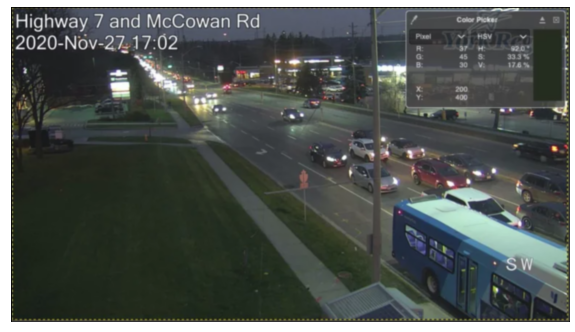

In [4]:
colorimage = cv2.imread("HighwayNight.jpg")
showimage(colorimage)

**Color Image Histograms**:
Rather than having only a single channel to process, color images can have 3 channels. As a result we need to slightly adjust the approach we took on greyscale images. In order to plot the histogram, we shall create histograms for each channel followed by combining them onto a single plot.

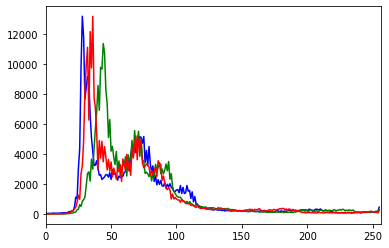

In [5]:
color = ('b','g','r')
 
#Loop through each color sequentially
for i,col in enumerate(color):
     
    #To use OpenCV's calcHist function, uncomment below
    #histr = cv2.calcHist([colorimage],[i],None,[256],[0,256])
     
    #To use numpy histogram function, uncomment below
    histr, _ = np.histogram(colorimage[:,:,i],256,[0,256])
 
    plt.plot(histr,color = col)  #Add histogram to our plot 
    plt.xlim([0,256])
     
plt.show()  #Show our plot

**Color Image Histogram Equalizations:**
Once we have our color image histogram, we next attempt to equalize each channel. As a result, we hope to achieve a wider distribution and thereby enhance contrast. Since OpenCV’s equalizeHist function only works with a single channel at a time, we quickly apply this function as below.

In [6]:
# For ease of understanding, we explicitly equalize each channel individually
colorimage_b = cv2.equalizeHist(colorimage[:,:,0])
colorimage_g = cv2.equalizeHist(colorimage[:,:,1])
colorimage_r = cv2.equalizeHist(colorimage[:,:,2])
 
# Next we stack our equalized channels back into a single image
colorimage_e = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)
colorimage_e.shape

(433, 768, 3)

As shown above, after we had equalized each channel, we used Numpy’s stack function to combine them back into our image. In order to verify this was successful, we quickly checked the shape of our array.

Now, we are going to plot the new histogram to see what happens after equalization followed by displaying the new and old image for the verifications of the results.

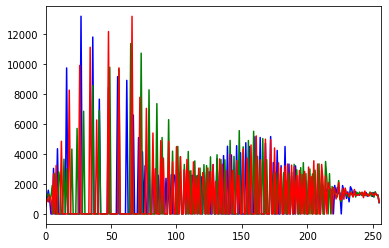

In [7]:
# Using Numpy to calculate the histogram
color = ('b','g','r')
for i,col in enumerate(color):
    histr, _ = np.histogram(colorimage_e[:,:,i],256,[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

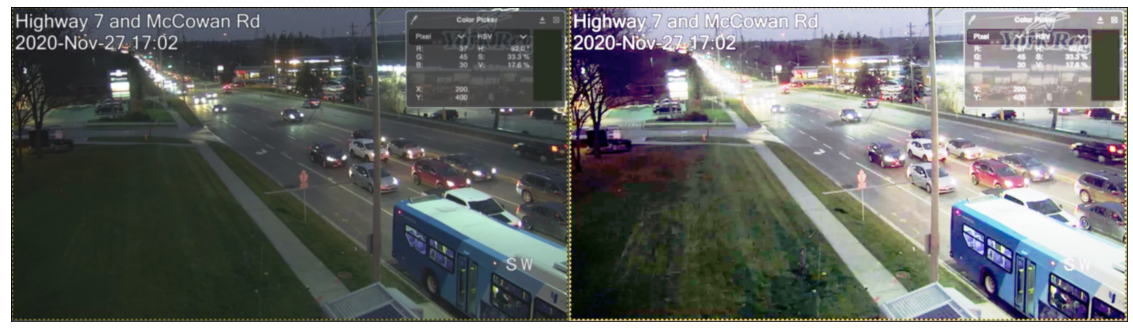

In [8]:
# Using Numpy's function to append the two images horizontally
side_by_side = np.hstack((colorimage,colorimage_e))
showimage(side_by_side,[20,10])

**Results**:
Generally, as we compare the old and new image, without doubt we managed to improve the image’s contrast. For instance, notice how the blue bus on the lower right has more distinct border around its’ doors and windows. Additionally, the grass field on the lower left also exhibits more details and texture. These are desired and welcomed results after improving contrast.